<a href="https://colab.research.google.com/github/dhanu902/FoodieChat-Bot/blob/main/BOT_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##### List content

In [13]:
!ls /content/drive/MyDrive/ChatBot/MultiWOZ_2.2/train

dialogues_001.json  dialogues_006.json	dialogues_011.json  dialogues_016.json
dialogues_002.json  dialogues_007.json	dialogues_012.json  dialogues_017.json
dialogues_003.json  dialogues_008.json	dialogues_013.json
dialogues_004.json  dialogues_009.json	dialogues_014.json
dialogues_005.json  dialogues_010.json	dialogues_015.json


##### Combine all train data into one File

In [14]:
train_path = '/content/drive/MyDrive/ChatBot/MultiWOZ_2.2/train'

In [16]:
import json
import os

train_data = {}

for filename in sorted(os.listdir(train_path)):
  if filename.endswith('.json'):
    with open(os.path.join(train_path, filename), 'r') as f:
      dialogues = json.load(f)
      for dialogue in dialogues:
        train_data[dialogue['dialogue_id']] = dialogue

print(f"Total dialogues loaded: {len(train_data)}")

Total dialogues loaded: 8437


#***EDA***

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [18]:
print(f"Total Dialogues: {len(train_data)}")

Total Dialogues: 8437


In [19]:
sample_key = list(train_data.keys())[0]
sample_dialogue = train_data[sample_key]
print(json.dumps(sample_dialogue, indent=2))

{
  "dialogue_id": "PMUL4398.json",
  "services": [
    "restaurant",
    "hotel"
  ],
  "turns": [
    {
      "frames": [
        {
          "actions": [],
          "service": "restaurant",
          "slots": [],
          "state": {
            "active_intent": "find_restaurant",
            "requested_slots": [],
            "slot_values": {
              "restaurant-area": [
                "centre"
              ],
              "restaurant-pricerange": [
                "expensive"
              ]
            }
          }
        },
        {
          "actions": [],
          "service": "taxi",
          "slots": [],
          "state": {
            "active_intent": "NONE",
            "requested_slots": [],
            "slot_values": {}
          }
        },
        {
          "actions": [],
          "service": "train",
          "slots": [],
          "state": {
            "active_intent": "NONE",
            "requested_slots": [],
            "slot_values": {}
       

In [20]:
services_counter = {}
turn_per_dialogue = []
domains_in_dialogue = []

for dialogue in train_data.values():
  services = dialogue.get("services", [])
  for service in services:
    services_counter[service] = services_counter.get(service, 0) + 1
  domains_in_dialogue.append(services)
turn_per_dialogue.append(len(dialogue.get("turns", [])))

services_df = pd.DataFrame(list(services_counter.items()), columns=["Domain", "Count"])

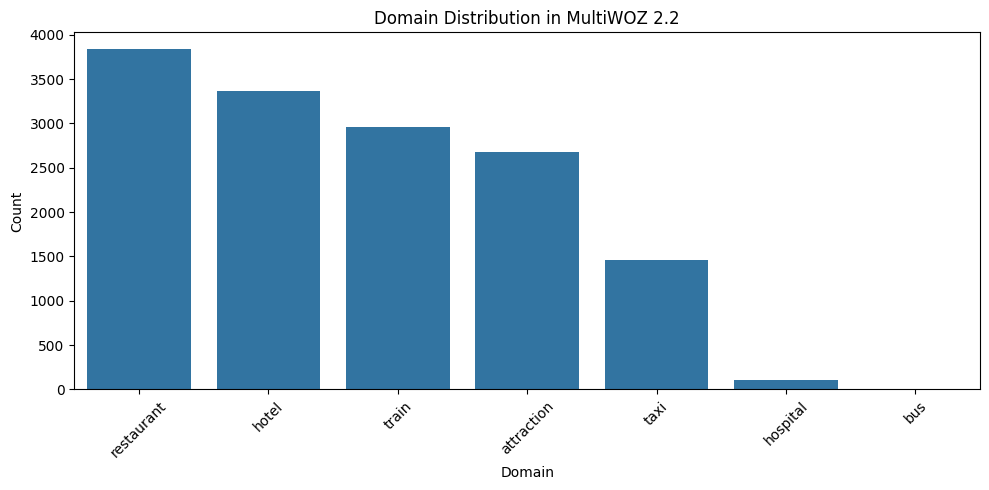

In [22]:
plt.figure(figsize=(10, 5))
sn.barplot(data=services_df.sort_values(by="Count", ascending=False), x="Domain", y="Count")
plt.title("Domain Distribution in MultiWOZ 2.2")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()